# Exploratory Data Analysis

## Imports

In [7]:
# Std lib:
import warnings
import os

# To hide environment variables
from dotenv import load_dotenv

# Data manipulation:
import numpy as np
import pandas as pd
import geopandas
from shapely.geometry import Point, Polygon

# Visualization:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
style.use('seaborn')

# Display all columns in Jupyter:
from IPython.display import display
pd.options.display.max_columns = None

# Filter Warnings
warnings.filterwarnings('ignore')

## Pull in the Data

In [8]:
datatypes = {'block': 'object',
             'iucr': 'object',
             'primary_type': 'object',
             'description': 'object',
             'location_description': 'object',
             'arrest': 'bool',
             'domestic': 'bool',
             'beat': 'int64',
             'district': 'float64',
             'ward': 'float64',
             'community_area': 'int64',
             'fbi_code': 'object',
             'x_coordinate': 'float64',
             'y_coordinate': 'float64',
             'year': 'int64',
             'latitude': 'float64',
             'longitude': 'float64',
             'location': 'object',
             'month': 'uint8',
             'hour': 'uint8',
             'dayofweek': 'uint8',
             'weekend': 'bool',
             'CF': 'float64',
             'CF3': 'float64',
             'PI': 'float64',
             'EUH': 'float64',
             'CH': 'float64',
             'SOI': 'float64',
             'crime_code_category': 'category',
             'index_crime': 'bool',
             'violent_crime': 'bool',
             'property_crime': 'bool',
             'crime_against_persons': 'bool',
             'crime_against_property': 'bool',
             'crime_against_society': 'bool'}

In [9]:
load_dotenv()
path_to_data = os.environ.get('CLEAN_DATA')
df = pd.read_csv(path_to_data, dtype=datatypes)

In [10]:
df.head()

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,latitude,longitude,location,month,hour,dayofweek,weekend,geometry,CF,CF3,PI,EUH,CH,SOI,crime_code_category,index_crime,violent_crime,property_crime,crime_against_persons,crime_against_property,crime_against_society
0,2007-10-05 06:00:00+00:00,085XX S MACKINAW AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,424,4.0,10.0,46,26,1199954.0,1848919.0,2007,41.740223,-87.542967,"(41.740223238, -87.54296695)",10,6,4,False,POINT (-87.54296694999999 41.740223238),-0.320158,-0.133512,-0.244759,-0.116078,-0.034319,0.074998,Misc Non-Index Offense,False,False,False,False,False,True
1,2007-10-03 16:38:13+00:00,021XX W PERSHING RD,4220,KIDNAPPING,AGGRAVATED,ABANDONED BUILDING,False,False,913,9.0,11.0,59,26,1162793.0,1878797.0,2007,41.823068,-87.678286,"(41.823068347, -87.678286102)",10,16,2,False,POINT (-87.678286102 41.823068347),-0.320158,-0.133512,-0.244759,-0.116078,-0.034319,0.074998,Misc Non-Index Offense,False,False,False,False,False,True
2,2007-10-18 13:09:00+00:00,023XX W 95TH ST,1330,CRIMINAL TRESPASS,TO LAND,BANK,True,False,2221,22.0,19.0,72,26,1162565.0,1841589.0,2007,41.720969,-87.680159,"(41.720969202, -87.680159235)",10,13,3,False,POINT (-87.680159235 41.720969202),-0.320158,-0.133512,-0.244759,-0.116078,-0.034319,0.074998,Misc Non-Index Offense,False,False,False,False,False,True
3,2007-10-24 15:34:30+00:00,099XX S AVENUE H,1350,CRIMINAL TRESPASS,TO STATE SUP LAND,"SCHOOL, PUBLIC, GROUNDS",False,False,432,4.0,10.0,52,26,1202797.0,1839847.0,2007,41.715257,-87.532860,"(41.715256909, -87.532859912)",10,15,2,False,POINT (-87.53285991200001 41.715256909),-0.320158,-0.133512,-0.244759,-0.116078,-0.034319,0.074998,Misc Non-Index Offense,False,False,False,False,False,True
4,2007-10-09 13:26:25+00:00,055XX N CHRISTIANA AVE,1350,CRIMINAL TRESPASS,TO STATE SUP LAND,"SCHOOL, PUBLIC, GROUNDS",False,False,1712,17.0,40.0,13,26,1153055.0,1936554.0,2007,41.981757,-87.712478,"(41.981757163, -87.712477774)",10,13,1,False,POINT (-87.71247777400001 41.981757163),-0.320158,-0.133512,-0.244759,-0.116078,-0.034319,0.074998,Misc Non-Index Offense,False,False,False,False,False,True


In [11]:
## TODO: Convert date to date time object and convert geometry to geopandas geometry object

In [12]:
df['date']= pd.to_datetime(df['date'])

In [13]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6508417 entries, 0 to 6508416
Data columns (total 37 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   date                    datetime64[ns, UTC]
 1   block                   object             
 2   iucr                    object             
 3   primary_type            object             
 4   description             object             
 5   location_description    object             
 6   arrest                  bool               
 7   domestic                bool               
 8   beat                    int64              
 9   district                float64            
 10  ward                    float64            
 11  community_area          int64              
 12  fbi_code                object             
 13  x_coordinate            float64            
 14  y_coordinate            float64            
 15  year                    int64              
 16  

In [14]:
# create copy of full dataframe
df_full = df.copy()

# Check shape of data; about six million crime objects spanning 20 years, 37 attributes
df_full.shape

(6508417, 37)

In [15]:
# trim primary dataframe to remove years with missing data
years_slice = [ '2002','2003','2004','2005','2006','2007',\
               '2008','2009','2010','2011','2012', '2013', \
               '2014', '2015', '2016','2017','2018','2019']

df = df.loc[df['year'].isin(years_slice)]

In [16]:
# slice smaller year selection into another dataframe for testing use
df_short = df.loc[df['year'].isin(['2010', '2011', '2012', '2013'])]

# Check shape of data; about a million crime objects spanning 4 years, 37 attributes
df_short.shape

(1362079, 37)

## Crime Data

In [17]:
# What are the most frequent and least frequent types of crimes?
df.groupby('primary_type').size().sort_values(ascending=False)

primary_type
THEFT                                1350309
BATTERY                              1165257
CRIMINAL DAMAGE                       727050
NARCOTICS                             652065
ASSAULT                               400421
OTHER OFFENSE                         395203
BURGLARY                              365386
MOTOR VEHICLE THEFT                   288447
DECEPTIVE PRACTICE                    252975
ROBBERY                               240597
CRIMINAL TRESPASS                     182809
WEAPONS VIOLATION                      71803
PROSTITUTION                           60597
PUBLIC PEACE VIOLATION                 45896
OFFENSE INVOLVING CHILDREN             43017
CRIM SEXUAL ASSAULT                    24328
SEX OFFENSE                            22761
INTERFERENCE WITH PUBLIC OFFICER       16275
GAMBLING                               13352
LIQUOR LAW VIOLATION                   12202
ARSON                                  10200
HOMICIDE                                92

From 2017-2020, the most frequent type of crime is theft in 216942 objects followed by battery and criminal damage as seen above. On the other hand, human trafficking and public indecency are some crime types that are least frequent. We can see a good general picture of the frequency of crime types.

In [18]:
# What are the most common and least common descriptions of crimes?
df.groupby('description').size().sort_values(ascending=False)

description
SIMPLE                                              700962
DOMESTIC BATTERY SIMPLE                             542446
$500 AND UNDER                                      492580
TO VEHICLE                                          351820
TO PROPERTY                                         332402
                                                     ...  
THEFT / RECOVERY - TRUCK, BUS, MOBILE HOME               1
THEFT / RECOVERY - CYCLE, SCOOTER, BIKE WITH VIN         1
AGGRAVATED: KNIFE / CUTTING INSTRUMENT                   1
MARRYING A BIGAMIST                                      1
THEFT OF LOST / MISLAID PROPERTY                         1
Length: 467, dtype: int64

From 2017-2020, the most common description of crimes is "simple" at 105120 rows followed by "domestic battery simple". (Notice that battery is also high on the crime type occurances)

In [19]:
# What are the most frequent and least frequent locations (given in description) of crimes?
df.groupby('location_description').size().sort_values(ascending=False)

location_description
STREET                    1633671
RESIDENCE                 1056497
APARTMENT                  694195
SIDEWALK                   647107
OTHER                      237685
                           ...   
LAGOON                          1
JUNK YARD/GARBAGE DUMP          1
CTA SUBWAY STATION              1
BANQUET HALL                    1
EXPRESSWAY EMBANKMENT           1
Length: 210, dtype: int64

From 2017-2020, the most frequent locations of crimes is the street in 207815 rows followed by residences and apartments as seen above. On the other hand, we can see that YMCA, government buildings (which is kind of expected) and motels are some of the safest locations.

In [20]:
# How many arrests are made from 2002-2019?
df.groupby('arrest').size()

arrest
False    4627209
True     1738419
dtype: int64

Wow! There are a lot more criminals that have not been arrested :O

In [21]:
# Percent that have been arrested
(df.arrest.value_counts().loc[True]) / (df['arrest'].count())

0.2730946577462585

We can see that most people who commited crimes from 2017-2020 have not been arrested. In fact, only about 25 percent of those people have been arrested so far.

In [22]:
# How many of the crimes are domestic? 
df.groupby('domestic').size()

domestic
False    5511536
True      854092
dtype: int64

We can see that most crimes from 2017-2020 are not domestic.

In [23]:
# Ratio of Not Domestic to Domestic
(df.domestic.value_counts().loc[False]) / (df.domestic.value_counts().loc[True])

6.4530940460746615

We can see that a crime object is about 5 times more likely to be non-domestic than domestic.

In [24]:
# Crime distribution over 2002-2019. Any ups and downs?
df.groupby('year').size()

year
2002    345024
2003    471993
2004    467130
2005    449868
2006    445497
2007    435531
2008    419789
2009    385845
2010    369792
2011    350894
2012    335085
2013    306308
2014    273586
2015    257756
2016    266455
2017    264122
2018    262796
2019    258157
dtype: int64

Text(0, 0.5, 'Crime count')

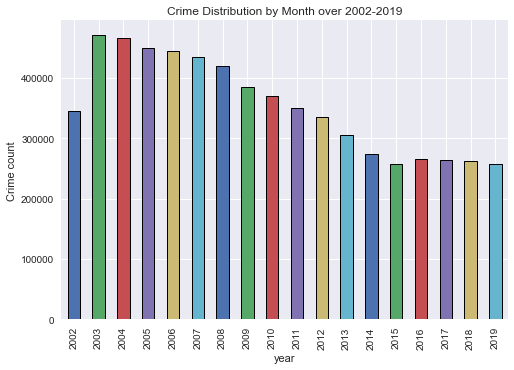

In [25]:
histoy = df.groupby('year').size().plot.bar(edgecolor='black', linewidth=1, color=sns.color_palette())
histoy.set_title('Crime Distribution by Month over 2002-2019')
histoy.set_ylabel('Crime count')

Looking above, we see that yearly total of crime has consistently dropped since 2003, before essentially bottoming out in 2015. Since then, it is has been quite consistent around the 260000 mark. 

In [26]:
# Which months peak in crime counts?
df.groupby('month').size()

month
1     466999
2     412110
3     497235
4     510177
5     580889
6     576818
7     605582
8     599235
9     561337
10    564866
11    507794
12    482586
dtype: int64

Text(0, 0.5, 'Crime count')

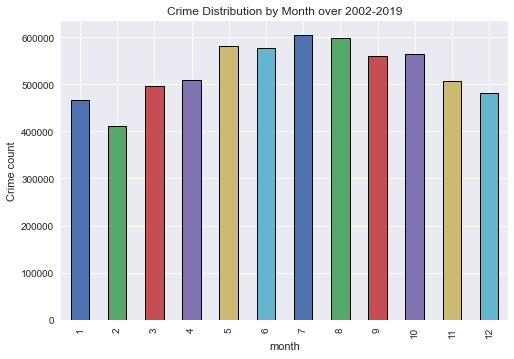

In [27]:
histom = df.groupby('month').size().plot.bar(edgecolor='black', linewidth=1, color=sns.color_palette())
histom.set_title('Crime Distribution by Month over 2002-2019')
histom.set_ylabel('Crime count')


As we can see, there is a clear peak in crimes commited in the months of July and Auguest in a four year period. This also means that overall, total crime count spanning the 4 years is likely highest in the summer time. This is a total count so does not entail that the average count of crimes per year is highest in those months. (We can investigate that deeper) We also have to take into accout that year 2020 is not finished but almost finished, so the last few months are expected to grow higher.

In [28]:
# Which hours peak in crime counts?
df.groupby('hour').size()

hour
0     347030
1     201723
2     169854
3     137121
4     103343
5      86223
6     102052
7     146428
8     216083
9     273731
10    268190
11    282894
12    362526
13    303065
14    322693
15    339740
16    320889
17    325687
18    348979
19    362641
20    360536
21    351424
22    346411
23    286365
dtype: int64

Text(0, 0.5, 'Crime count')

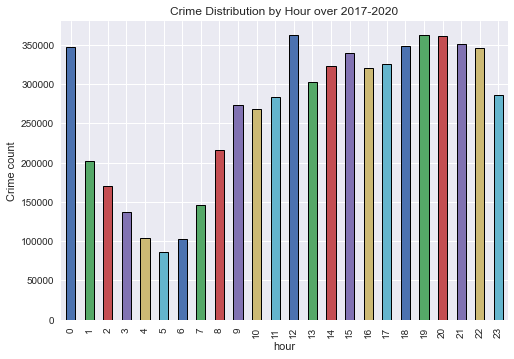

In [29]:
histom = df.groupby('hour').size().plot.bar(edgecolor='black', linewidth=1, color=sns.color_palette())
histom.set_title('Crime Distribution by Hour over 2017-2020')
histom.set_ylabel('Crime count')

We can clearly see that highest number of crimes occured mid-day at about lunch time. This is a little surprising as I expected the most crimes to occur at night time right before mid-night or after mid-night. We see from the plot that in fact, crime counts started dropping after mid-night until about 5am and started rising again until mid-day.

In [30]:
# Which day of week peak in crime counts?
df.groupby('dayofweek').size()

dayofweek
0    897302
1    910852
2    916280
3    907224
4    958998
5    911336
6    863636
dtype: int64

Text(0, 0.5, 'Crime count')

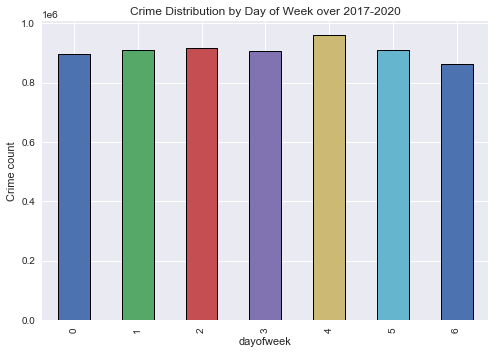

In [31]:
histom = df.groupby('dayofweek').size().plot.bar(edgecolor='black', linewidth=1, color=sns.color_palette())
histom.set_title('Crime Distribution by Day of Week over 2017-2020')
histom.set_ylabel('Crime count')

From the values and plots displayed above, there is no noticable big fluctuations in the days that crimes were commited.

In [32]:
# Crime commited during weekday and weekend
df.groupby('weekend').size()

weekend
False    4590656
True     1774972
dtype: int64

I expected a lot more crimes to be commited during the weekday. After all, weekday consists of 5 days and weekend consists of 2. This is about right on par with my prediction.

## Economic Data

In [33]:
# Econ data general summary from 2002-2019
df[['CF', 'CF3', 'PI', 'EUH', 'CH', 'SOI']].describe()

,CF,CF3,PI,EUH,CH,SOI
count,6.365628e+06,6.365628e+06,6.365628e+06,6.365628e+06,6.365628e+06,6.365628e+06
mean,-1.154093e-01,-1.146265e-01,-2.886296e-02,-2.957748e-02,-4.829431e-02,-8.674588e-03
std,5.432754e-01,4.738192e-01,2.584328e-01,1.659193e-01,1.156415e-01,1.503983e-01
min,-2.850398e+00,-2.582804e+00,-1.323060e+00,-8.512768e-01,-4.143385e-01,-6.495952e-01
25%,-2.970951e-01,-1.652203e-01,-1.423962e-01,-7.646867e-02,-1.334986e-01,-7.846229e-02
50%,-1.743267e-02,-2.510259e-02,-7.597243e-03,1.420138e-02,-3.937980e-02,7.694670e-03
75%,1.794367e-01,1.122865e-01,1.215425e-01,6.794198e-02,4.345825e-02,8.603783e-02
max,7.958836e-01,5.576735e-01,5.055248e-01,2.331403e-01,2.057486e-01,4.278704e-01


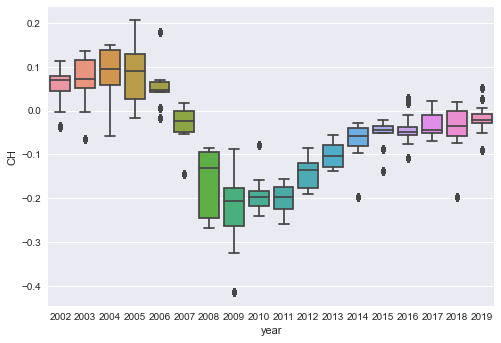

In [34]:
# Box-plot for CH vs. year
box = sns.boxplot(x='year',y='CH',data=df)
sns.set(rc={'figure.figsize':(15,10)})

In [35]:
# Let's check out some correlations

# Let's recreate the economic dataset

In [36]:
econ_df = pd.DataFrame(df.groupby(['year', 'month'])['CF', 'PI', 'EUH', 'CH', 'SOI'].mean()).reset_index()

In [38]:
temp = econ_df.drop(['CF', 'month'], axis=1)

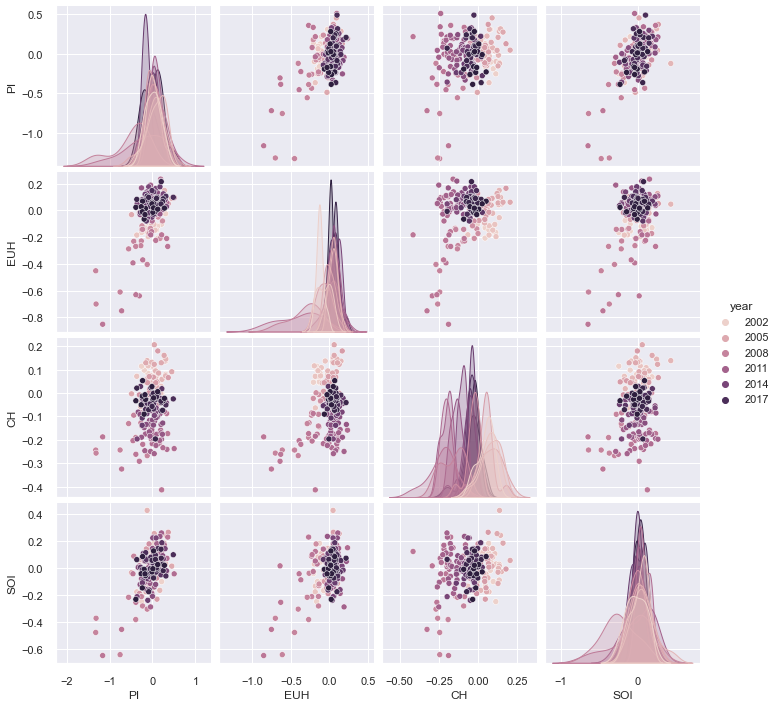

In [39]:
sns.pairplot(temp, hue='year');

Ok, the economic metrics are certainly correlated. By differentiationg the plot points using the color channel,
we notice something else, however. The years 2008 and 2009 are the cause for most of the outliers and by far trend down and to the left, instead of clustering around the center with most other years. Let's look at this further by taking a look at the economic data in a timeseries. We will use the CF metric, which aggregates all four of the time series we just analyzed.

In [40]:
econ_df['date'] = pd.to_datetime([f'{y}-{m}-01' for y, m in zip(econ_df.year, econ_df.month)])

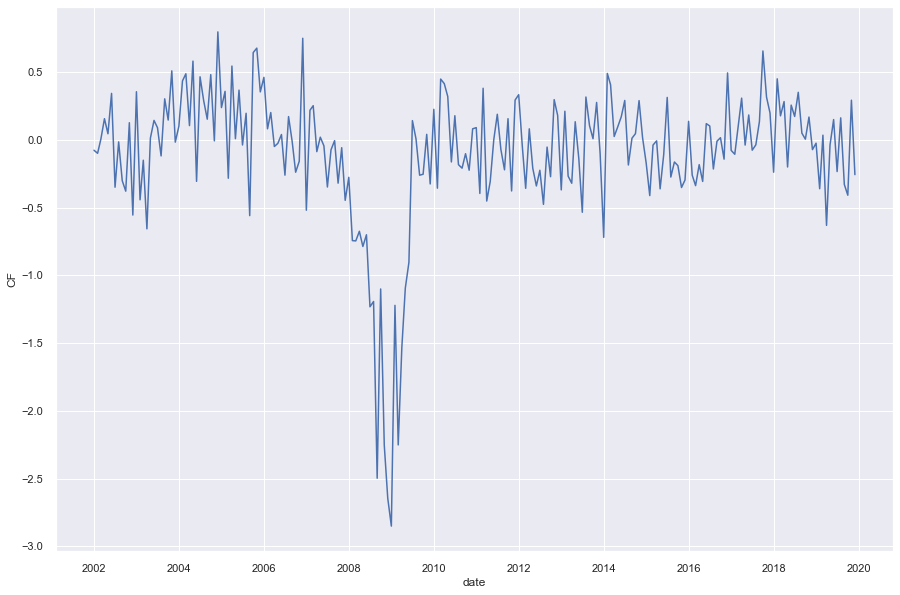

In [41]:
sns.lineplot(x="date", y="CF", data=econ_df);

Clearly, the trend we identified in our multiple scatterplot was due to the major recession we see here. This is interesting because while crime was high in 2008 and 2009, as we saw earlier it continued on its trend of less total crime each year before bottoming out in 2015. This is worth looking more into:

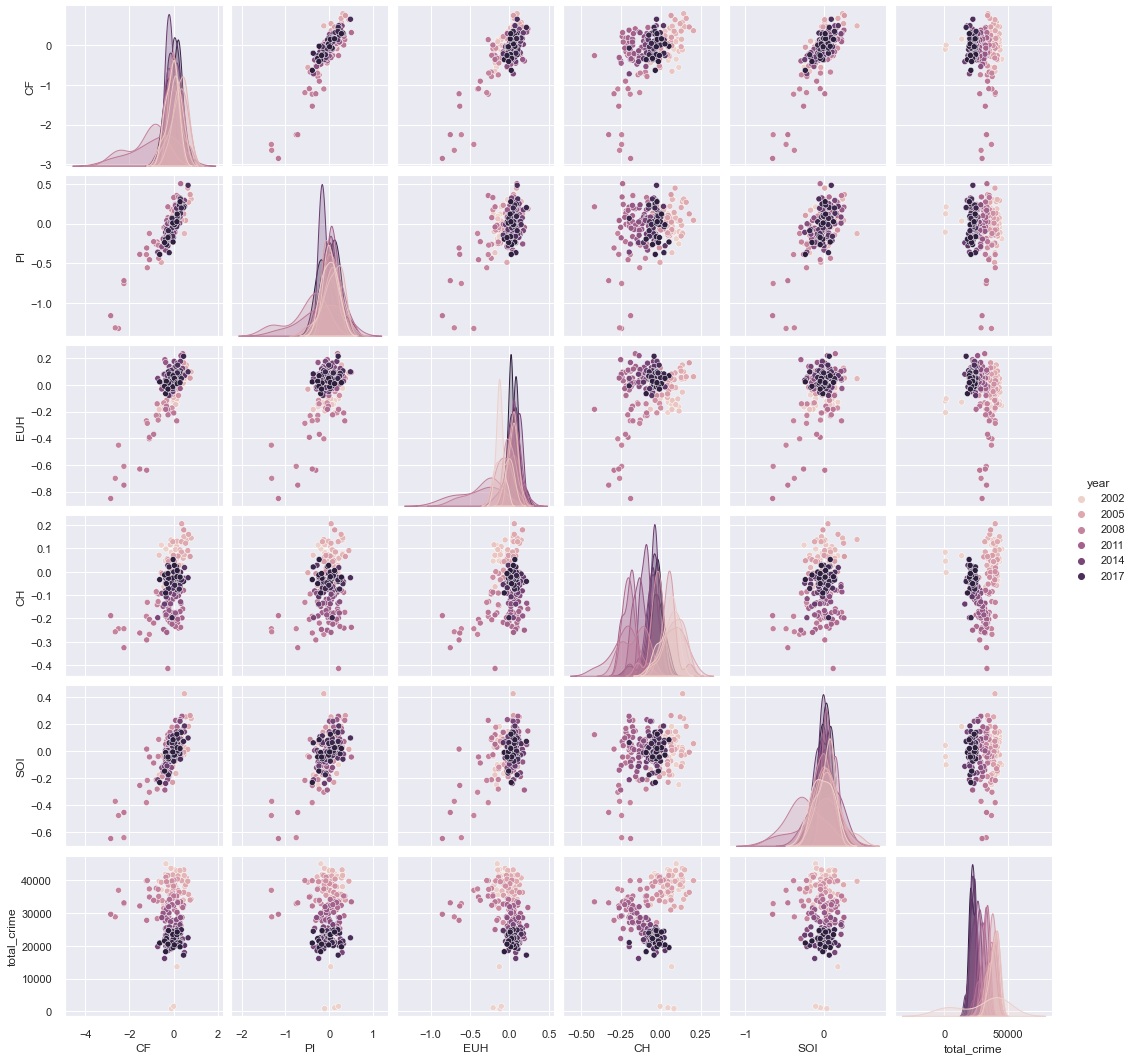

In [42]:
total_crime_df = pd.DataFrame(df.groupby(['year', 'month']).size()).reset_index()  # Total crime per month
total_crime_df.columns = ['year', 'month', 'total_crime']  # Rename the columns
total_crime_plus_econ_df = pd.merge(econ_df, total_crime_df)
sns.pairplot(total_crime_plus_econ_df.drop(['month', 'date'], axis=1), hue='year');

By including the CF Metric (aggregate of all others) as well as total crime, we can see that there is no major correlation between total crime and our economic metrics. We focus in on this finding here:

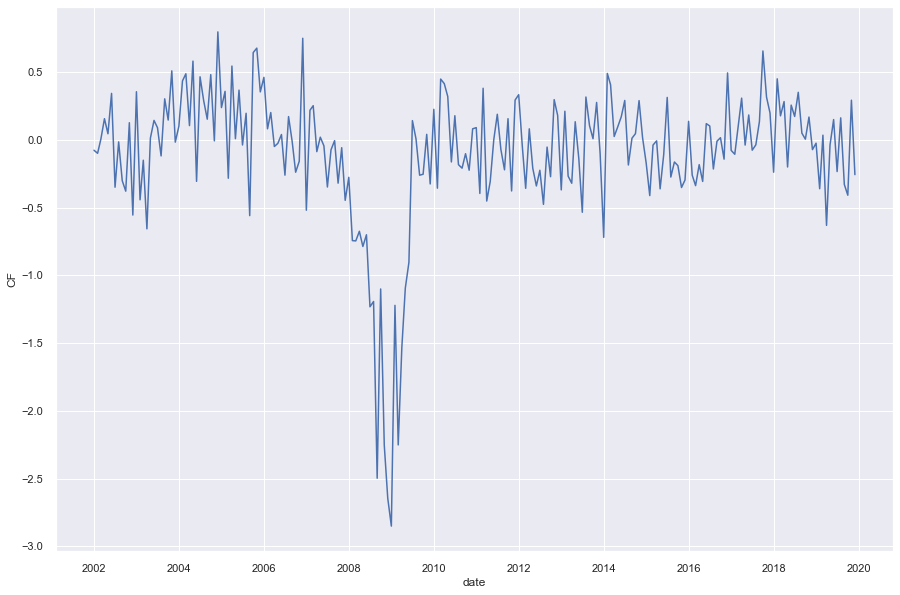

In [43]:
sns.lineplot(x="date", y="CF", data=total_crime_plus_econ_df);

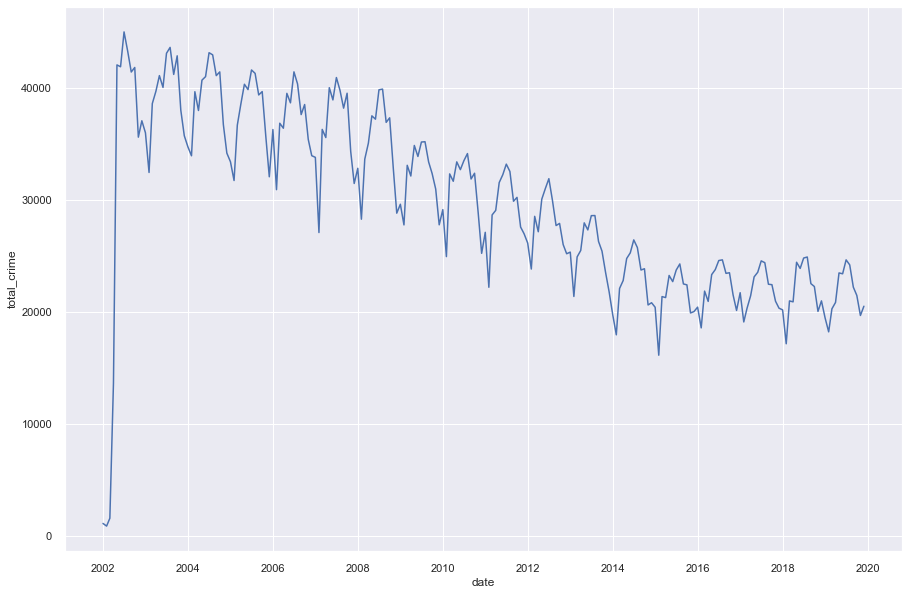

In [44]:
sns.lineplot(x="date", y="total_crime", data=total_crime_plus_econ_df);

While these results were somewhat surprising, it does not mean that crime and the economy are not correlated at all, or at least not associated in some ways. It is entirely possible that some subset of crime is correlated to one but not all of the economic series, for example. It is also possible they are associated by some other factor. We explore this exact possibility by expanding the dataset to include 2020, where we see several interesting changes to the data and economic data as a result of COVID-19 pandemic that are worth exploring:

In [45]:
econ_df_full = pd.DataFrame(df_full.groupby(['year', 'month'])['CF', 'PI', 'EUH', 'CH', 'SOI'].mean()).reset_index()
econ_df_full['date'] = pd.to_datetime([f'{y}-{m}-01' for y, m in zip(econ_df_full.year, econ_df_full.month)])
total_crime_df_full = pd.DataFrame(df_full.groupby(['year', 'month']).size()).reset_index()  # Total crime per month
total_crime_df_full.columns = ['year', 'month', 'total_crime']  # Rename the columns
total_crime_plus_econ_df_full = pd.merge(econ_df_full, total_crime_df_full)

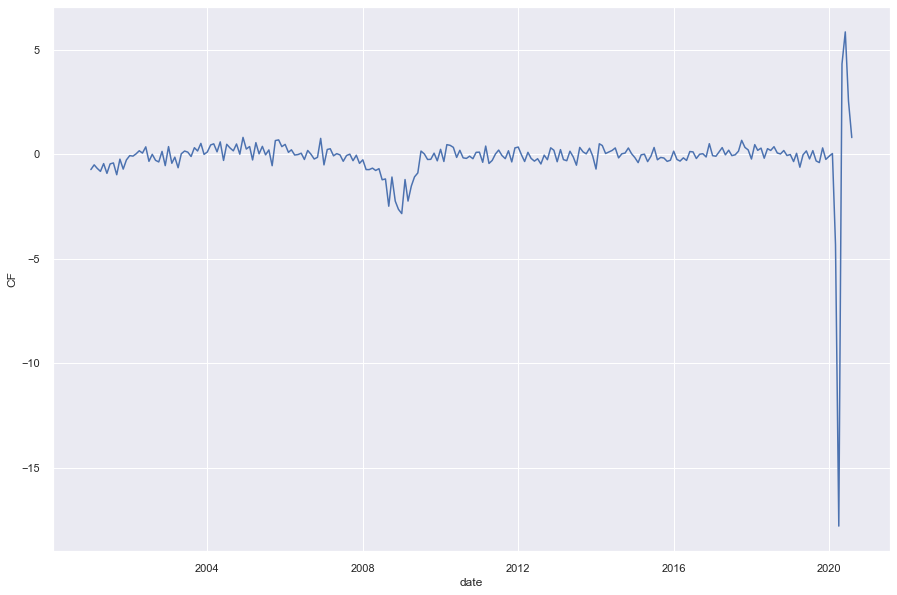

In [46]:
sns.lineplot(x="date", y="CF", data=total_crime_plus_econ_df_full);

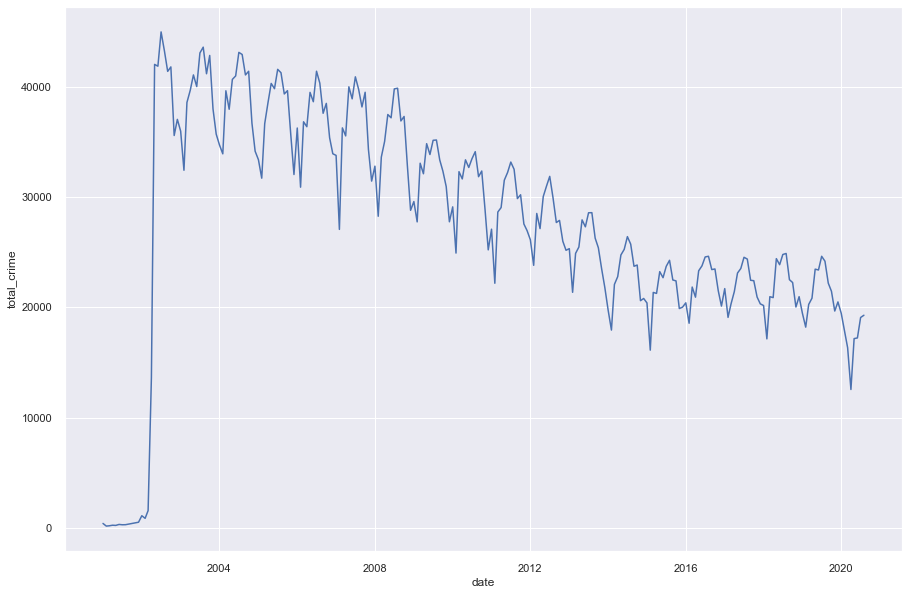

In [47]:
sns.lineplot(x="date", y="total_crime", data=total_crime_plus_econ_df_full);

Interestingly, while total crime does not appear to dip with the economy during the 2008 recession, we do see a significant dip in crime at the exact same time that the economy nose-dives in 2020, leading us to ask...

### Question: What caused the major dropoff in crime during the start of COVID?

#### Let's look at 2020 with 2019 to put it into some context.

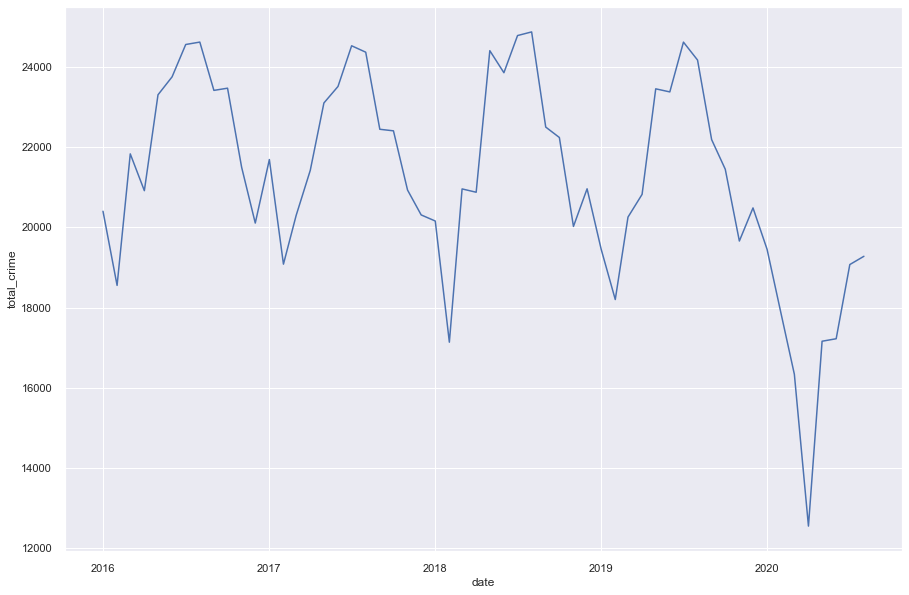

In [124]:
last_5 = [2016, 2017, 2018, 2019, 2020]
temp1 = total_crime_plus_econ_df_full.loc[total_crime_plus_econ_df_full['year'].isin(last_5)]

sns.lineplot(x="date", y="total_crime", data=temp1);

#### Clearly there was a dropoff in the month of April. Let's remove the cycles by only looking at the months of April over the past years.

In [125]:
aprils_df = df_full[(df_full.month == 4)]
# TODO: pie charts for primary_type for different months

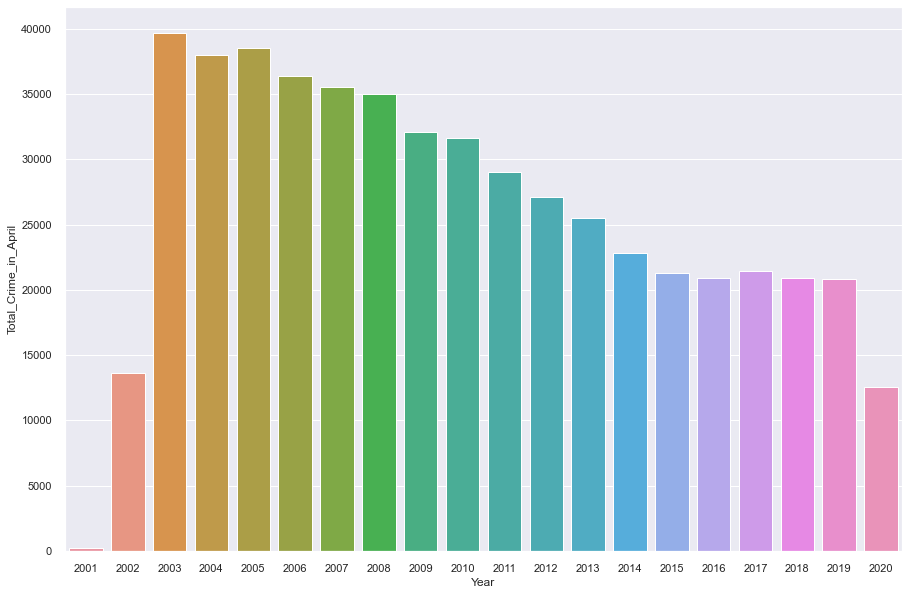

In [126]:
april_year_over_year = pd.DataFrame(aprils_df.groupby('year').size()).reset_index()
april_year_over_year.columns = ['Year', 'Total_Crime_in_April']
sns.barplot(x='Year', y='Total_Crime_in_April', data=april_year_over_year);

#### By controlling for seasonal variation, we can see that indeed April 2020 was unique.

In [164]:
april_year_type_df = pd.DataFrame(aprils_df.groupby(['year', 'primary_type']).size()).reset_index()
last_3 = [2018, 2019, 2020]
temp2 = april_year_type_df.loc[april_year_type_df['year'].isin(last_3)]
temp2.columns = ['year', 'primary_type', 'count']
t_2020 = temp2[temp2.year == 2020]
t_2020.columns = ['year', 'primary_type', '2020_count']
t_2019 = temp2[temp2.year == 2019]
t_2019.columns = ['year', 'primary_type', '2019_count']
t_2018 = temp2[temp2.year == 2018]
t_2018.columns = ['year', 'primary_type', '2018_count']
temp2 = pd.merge(t_2019, t_2020, on="primary_type")
temp2 = pd.merge(temp2, t_2018)
temp2.drop(['year_x', 'year_y', 'year'], inplace=True, axis=1)
temp2['2019_percent'] = (temp2['2019_count'] / temp2['2019_count'].sum() * 100)
temp2['2020_percent'] = (temp2['2020_count'] / temp2['2020_count'].sum() * 100)
temp2['2018_percent'] = (temp2['2018_count'] / temp2['2018_count'].sum() * 100)
temp2['diff_2019_2020'] = temp2['2020_percent'] - temp2['2019_percent']
temp2['diff_2018_2019'] = temp2['2019_percent'] - temp2['2018_percent']
temp2=temp2.reindex(columns=['primary_type', '2018_count', '2019_count', '2020_count', '2018_percent', 'diff_2018_2019', '2019_percent', 'diff_2019_2020', '2020_percent'])

In [165]:
temp2

,primary_type,2018_count,2019_count,2020_count,2018_percent,diff_2018_2019,2019_percent,diff_2019_2020,2020_percent
0,ARSON,27,31,35,0.130083,0.019408,0.149491,0.129438,0.278929
1,ASSAULT,1639,1732,1109,7.896512,0.455709,8.352221,0.485841,8.838062
2,BATTERY,3798,3974,2689,18.298323,0.865490,19.163813,2.265896,21.429710
3,BURGLARY,942,700,519,4.538447,-1.162838,3.375609,0.760508,4.136117
4,CONCEALED CARRY LICENSE VIOLATION,11,20,7,0.052997,0.043449,0.096446,-0.040660,0.055786
5,CRIMINAL DAMAGE,2235,2276,1772,10.767971,0.207580,10.975551,3.146221,14.121772
6,CRIMINAL SEXUAL ASSAULT,9,37,57,0.043361,0.135064,0.178425,0.275831,0.454256
7,CRIMINAL TRESPASS,585,562,235,2.818462,-0.108330,2.710132,-0.837323,1.872808
8,DECEPTIVE PRACTICE,1447,1419,897,6.971478,-0.128637,6.842841,0.305708,7.148550
9,HOMICIDE,43,60,62,0.207169,0.082169,0.289338,0.204765,0.494103


#### There definitely appears to be a big dropoff in the amount of petty crimes in our dataset in April 2020, like Narcotics and theft.  This is something worth exploring!